<a href="https://colab.research.google.com/github/Likitha-Thirumalasetty/Parkinson-s-Disease-Prediction-using-Random-Forest-Regressor/blob/main/Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **To build a model to predict whether a person suffers with Parkinson's disease given certain conditions and characteristics**

**Parkinson's disease: It is a progressive disease of the nervous system marked by tremor, muscle rigidity and slow, imprecise movement often affecting middle-aged and elderly individuals of society.**

**Importing libraries and loading the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/telemonitoring_parkinsons_updrs.data.csv")

**Obtaining the first 5 records**

In [ ]:
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


**Obtaning the last 5 records**

In [ ]:
df.tail()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
5870,42,61,0,142.79,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.84,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.82,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.73,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204
5874,42,61,0,170.73,20.513,31.513,0.00282,0.000021,0.00135,0.00166,...,0.171,0.00946,0.01154,0.01470,0.02839,0.008172,23.259,0.58608,0.57077,0.15336


**Obtaining the shape of the dataset**

In [ ]:
df.shape

(5875, 22)

**Obtaining the different data types present in the dataset**

In [ ]:
df.dtypes

subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object

**Checking for null records**

In [ ]:
df.isnull()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5871,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5872,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5873,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Conclusion: So from this we can conclude that there are no null values in the dataset**

**Data visualisation for further analysis**

               subject#       age       sex  test_time  motor_UPDRS  \
subject#       1.000000 -0.030864  0.286851  -0.000882     0.252919   
age           -0.030864  1.000000 -0.041602   0.019884     0.273665   
sex            0.286851 -0.041602  1.000000  -0.009805    -0.031205   
test_time     -0.000882  0.019884 -0.009805   1.000000     0.067918   
motor_UPDRS    0.252919  0.273665 -0.031205   0.067918     1.000000   
total_UPDRS    0.253643  0.310290 -0.096559   0.075263     0.947231   
Jitter(%)      0.135448  0.023071  0.051422  -0.022837     0.084816   
Jitter(Abs)    0.075156  0.035691 -0.154645  -0.011365     0.050903   
Jitter:RAP     0.120339  0.010255  0.076718  -0.028888     0.072684   
Jitter:PPQ5    0.136474  0.013199  0.087995  -0.023290     0.076291   
Jitter:DDP     0.120350  0.010258  0.076703  -0.028876     0.072698   
Shimmer        0.146202  0.101554  0.058736  -0.033870     0.102349   
Shimmer(dB)    0.142864  0.111130  0.056481  -0.030962     0.110076   
Shimme

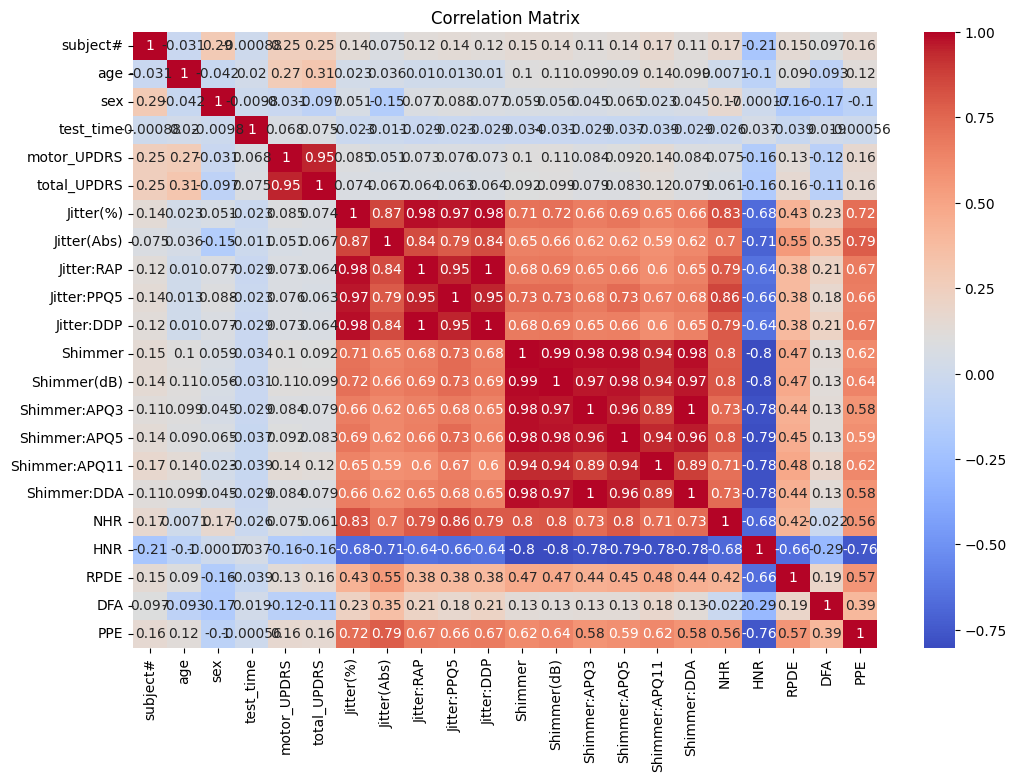

In [ ]:
#creating a correlation matrix
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**The above correlation matrix shows the relationships and the change one variable has with respect to the other**

**The Parkinson's disease severity can be measured using the columns "total_UPDRS" and "motor_UPDRS".**

**Building the model**

In [ ]:
# collecting only the columns or variables that contribute to Parkinson's disease prediction
X = df.drop(columns=['total_UPDRS', 'motor_UPDRS', 'subject#', 'test_time'])
y = df['total_UPDRS']

In [ ]:
# defining the train and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build the model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 8.839165198499307
R^2 Score: 0.9202335308768634


**Optimizing the model**

In [ ]:
# Optimize the model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Evaluate the optimized model
y_pred_optimized = best_model.predict(X_test)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized Mean Squared Error: {mse_optimized}")
print(f"Optimized R^2 Score: {r2_optimized}")

# Validate the model
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X, y, cv=5)
print(f"Cross-validated scores: {cv_scores}")
print(f"Mean cross-validated score: {cv_scores.mean()}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Mean Squared Error: 8.845424657381017
Optimized R^2 Score: 0.9201770442152384
Cross-validated scores: [-1.82564329 -4.90475341  0.3029345  -0.87712207 -1.08468974]
Mean cross-validated score: -1.6778548026132991
